About the dataset:

https://archive.ics.uci.edu/ml/datasets/adult

In [185]:
#importing all libraries
import pandas as pd
import numpy as np

#metrics
from sklearn.model_selection import cross_val_score
import scikitplot as skplt

#models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

#plotting
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [186]:
columns = ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num', 'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target']

In [187]:
train = pd.read_csv('adult.csv', names=columns, na_values=" ?")

In [151]:
train.sample(5)

,Age,Workclass,fnlwgt,Education,Education-Num,Martial Status,Occupation,Relationship,Race,Sex,Capital Gain,Capital Loss,Hours per week,Country,Target
18912,24,NaN,412156,HS-grad,9,Married-civ-spouse,NaN,Wife,White,Female,0,0,40,Mexico,<=50K
1372,43,Private,221550,Masters,14,Never-married,Other-service,Not-in-family,White,Female,0,0,30,Poland,<=50K
19761,29,Private,114801,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,<=50K
16661,26,Private,166666,Some-college,10,Never-married,Other-service,Not-in-family,White,Female,0,0,35,United-States,<=50K
19680,28,Private,64307,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,40,United-States,<=50K


In [152]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
Age               32561 non-null int64
Workclass         30725 non-null object
fnlwgt            32561 non-null int64
Education         32561 non-null object
Education-Num     32561 non-null int64
Martial Status    32561 non-null object
Occupation        30718 non-null object
Relationship      32561 non-null object
Race              32561 non-null object
Sex               32561 non-null object
Capital Gain      32561 non-null int64
Capital Loss      32561 non-null int64
Hours per week    32561 non-null int64
Country           31978 non-null object
Target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [153]:
#Counting unique values
for column in train.columns:
    num = train[column].nunique()
    print("{}: {}".format(column, num))

Age: 73
Workclass: 8
fnlwgt: 21648
Education: 16
Education-Num: 16
Martial Status: 7
Occupation: 14
Relationship: 6
Race: 5
Sex: 2
Capital Gain: 119
Capital Loss: 92
Hours per week: 94
Country: 41
Target: 2


In [154]:
for column in train.drop(columns=['Education-Num']).columns:
    num = train[column].nunique()
    if num<50:
        print("{}: {}\n".format(column, train[column].unique()))

Workclass: [' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 nan ' Self-emp-inc' ' Without-pay' ' Never-worked']

Education: [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']

Martial Status: [' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']

Occupation: [' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' nan
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']

Relationship: [' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']

Race: [' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']

Sex: [' Male' ' Female']

Country: [' United-States' ' Cuba' ' Jamaica' ' In

In [155]:
for column in train.drop(columns=['Education-Num']).columns:
    num = train[column].nunique()
    if num<50:
        print("{}\n".format(train[column].value_counts()))

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Martial Status, dtype: int64

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical

In [156]:
for column in train.columns:
    missing = column, train[column].isnull().sum()
    if missing[1] == 0: continue
    print(missing)

('Workclass', 1836)
('Occupation', 1843)
('Country', 583)


In [188]:
train = train.fillna(-1)

In [158]:
train['Target_cat'] = pd.factorize(train['Target'])[0]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

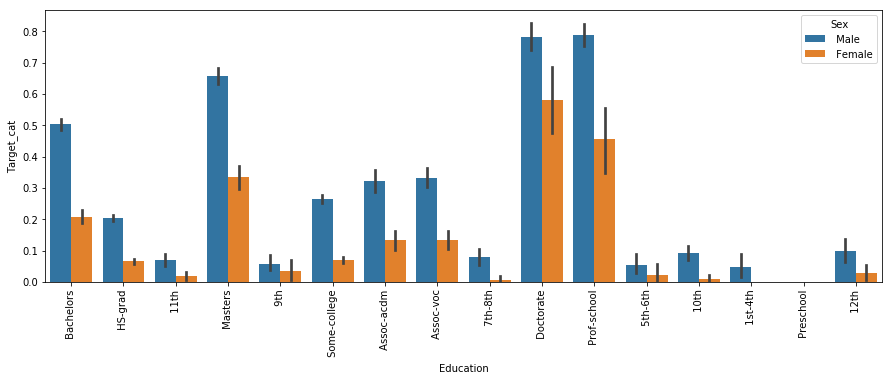

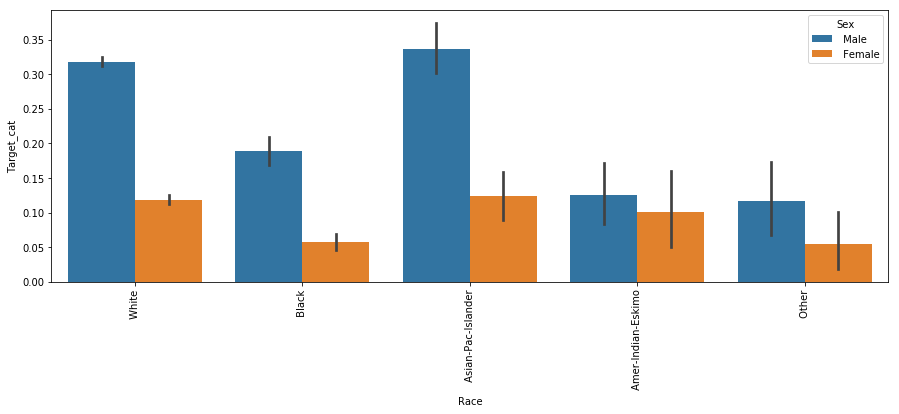

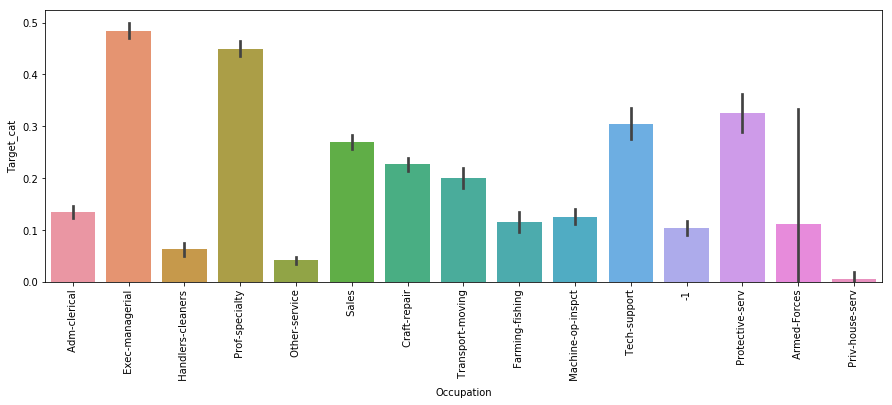

In [159]:
#Small feature exploration
#Education vs Target divided by Sex.

plt.figure(figsize=(15, 5))
sns.barplot(x="Education", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90)

#Race vs Target divided by Sex.

plt.figure(figsize=(15, 5))
sns.barplot(x="Race", y="Target_cat", hue='Sex', data=train)
plt.xticks(rotation=90)

#Occupation vs Target.

plt.figure(figsize=(15, 5))
sns.barplot(x='Occupation', y="Target_cat", data=train)
plt.xticks(rotation=90)

In [189]:
#Creating new Features
train['Net_Capital'] = train['Capital Gain'] - train['Capital Loss']
train['White_Man'] = (train['Race']=='White') & (train['Sex']==False)
train['High_Earner'] = ((train['Occupation'] == 'Exec-managerial') | (train['Occupation'] == 'Prof-specialty'))
train['United States'] = train['Country']== 'United-States'
train['Husb_Wife'] = ((train['Relationship']=='Husband') | (train['Relationship']=='Wife'))
train['Rel_Race'] = train['Relationship'] + train['Race']
train['Hard_worker'] = train['Hours per week']>40
train['Normal_worker'] = train['Hours per week']==40
train['Part_time_worker'] = train['Hours per week']<40

train['High_educ'] = ((train['Education']=='Bachelors') | 
                      (train['Education']=='Prof-school') | 
                      (train['Education']=='Masters') | 
                      (train['Education']=='Doctorate'))

train['Associate'] = ((train['Education']=='Assoc-voc') | 
                      (train['Education']=='Assoc-acdm'))

train['High_school'] = ((train['Education']=='HS-grad') | 
                        (train['Education']=='Some-college'))

train['Low_educ'] = ((train['Education']=='Preschool') | 
                     (train['Education']=='1st-4th') | 
                     (train['Education']=='5th-6th') | 
                     (train['Education']=='7th-8th') | 
                     (train['Education']=='9th') | 
                     (train['Education']=='10th ') |  
                     (train['Education']=='11th') | 
                     (train['Education']=='12th'))

Marriage = train['Martial Status'].copy()

Marriage[Marriage=="Never-married"] = "Never-Married"
Marriage[Marriage=="Married-AF-spouse"] = "Married"
Marriage[Marriage=="Married-civ-spouse"] = "Married"
Marriage[Marriage=="Married-spouse-absent"] = "Married"
Marriage[Marriage=="Separated"] = "Not-Married"
Marriage[Marriage=="Divorced"] = "Not-Married"
Marriage[Marriage=="Widowed"] = "Widowed"

train['Marriage'] = Marriage

In [190]:
# Changing labels
cat_feats = train.select_dtypes(include=[np.object]).columns

for cat_feat in cat_feats:
    train['{0}_cat'.format(cat_feat)] = pd.factorize(train[cat_feat])[0]

In [191]:
train.columns

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-Num',
       'Martial Status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital Gain', 'Capital Loss', 'Hours per week', 'Country', 'Target',
       'Net_Capital', 'White_Man', 'High_Earner', 'United States', 'Husb_Wife',
       'Rel_Race', 'Hard_worker', 'Normal_worker', 'Part_time_worker',
       'High_educ', 'Associate', 'High_school', 'Low_educ', 'Marriage',
       'Workclass_cat', 'Education_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Sex_cat',
       'Country_cat', 'Target_cat', 'Rel_Race_cat', 'Marriage_cat'],
      dtype='object')

In [207]:
#Removing Target_cat as that will be the target variable, and Education_cat because we already had Education-Num in the dataset
feats_all = train.select_dtypes(exclude=[np.object]).drop(columns=["Education_cat", "Target_cat"]).columns

Mean Accuracy:  0.8585118555178435 Mean Std:  0.0034615167626975774


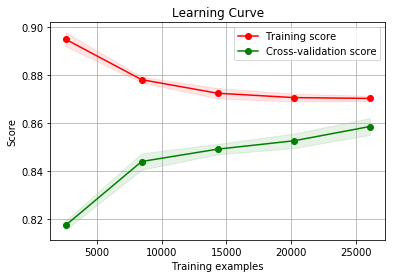

In [209]:
#Doing a model with initial features for benchmark - Decision Tree Classifier
np.random.seed(2019)

feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[feats].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
DTC_score = cross_val_score(model, X, y, cv=5)

print("Mean Accuracy: ", np.mean(DTC_score), "Mean Std: ", np.std(DTC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8585732617169743 Mean Std:  0.00293819257594177


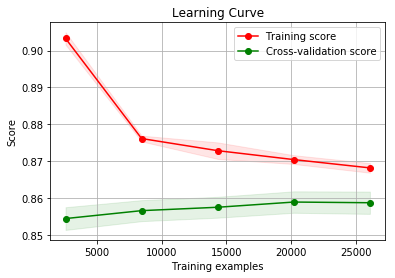

In [210]:
#Doing a model with initial features for benchmark - Random Forest Classifier
np.random.seed(2019)

feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8423576066540139 Mean Std:  0.003587142088836265


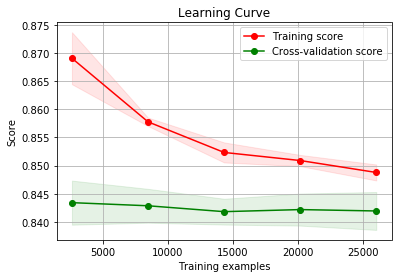

In [195]:
#Doing a model with initial features for benchmark - Extra Tree Classifier
np.random.seed(2019)

orig_feats = ['Age', 'fnlwgt', 'Education-Num', 'Sex_cat', 
         'Capital Gain', 'Capital Loss', 'Hours per week', 
         'Workclass_cat', 'Martial Status_cat', 
         'Occupation_cat', 'Relationship_cat', 'Race_cat', 
         'Country_cat']

X = train[orig_feats].values
y = train['Target_cat'].values

model = ExtraTreesClassifier(max_depth=10, n_estimators=100, random_state=2019)
ETC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(ETC_score), "Mean Std: ", np.std(ETC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

In [196]:
print('DecisionTreeClassifier -', "Mean Accuracy", np.mean(DTC_score), "Mean Std:", np.std(DTC_score))
print('RandomForestClassifier -', "Mean Accuracy:", np.mean(RFC_score), "Mean Std:", np.std(RFC_score))
print('ExtraTreesClassifier -', "Mean Accuracy:", np.mean(ETC_score), "Mean Std:", np.std(ETC_score))

DecisionTreeClassifier - Mean Accuracy 0.8585118555178435 Mean Std: 0.0034615167626975774
RandomForestClassifier - Mean Accuracy: 0.8585732617169743 Mean Std: 0.00293819257594177
ExtraTreesClassifier - Mean Accuracy: 0.8423576066540139 Mean Std: 0.003587142088836265


ExtraTreesClassifier has the lowest score, so we'll focus on **Decision Trees** and **Random Forests**

Mean Accuracy:  0.8583890053949934 Mean Std:  0.0034257942354373773


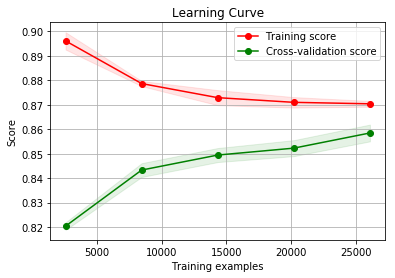

In [211]:
#Doing a model with all features - Decision Tree Classifier
np.random.seed(2019)

X = train[feats_all].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
DTC_score = cross_val_score(model, X, y, cv=5)

print("Mean Accuracy: ", np.mean(DTC_score), "Mean Std: ", np.std(DTC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8594331512744686 Mean Std:  0.0015476826611370057


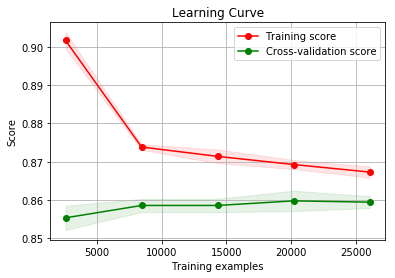

In [212]:
#Doing a model with all features - Random Forest Classifier
np.random.seed(2019)

X = train[feats_all].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

In [213]:
print('DecisionTreeClassifier -', "Mean Accuracy", np.mean(DTC_score), "Mean Std:", np.std(DTC_score))
print('RandomForestClassifier -', "Mean Accuracy:", np.mean(RFC_score), "Mean Std:", np.std(RFC_score))

DecisionTreeClassifier - Mean Accuracy 0.8583890053949934 Mean Std: 0.0034257942354373773
RandomForestClassifier - Mean Accuracy: 0.8594331512744686 Mean Std: 0.0015476826611370057


In [214]:
def draw_feature_importances(model, features):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 5))
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), model.feature_importances_[indices],
           color="b", align="center")
    plt.xticks(range(X.shape[1]), [ features[x] for x in indices])
    plt.xticks(rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.show()

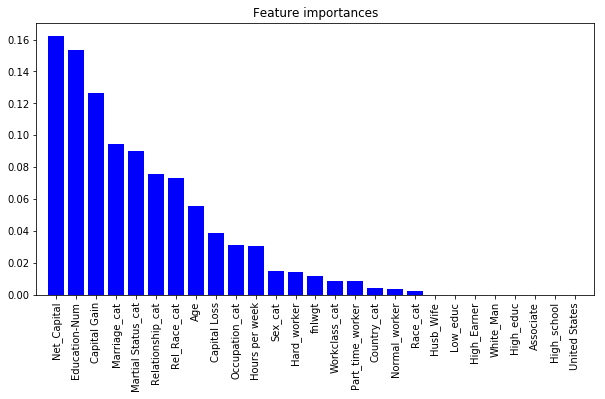

In [215]:
np.random.seed(2019)
model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
model.fit(X, y)
draw_feature_importances(model, feats_all)

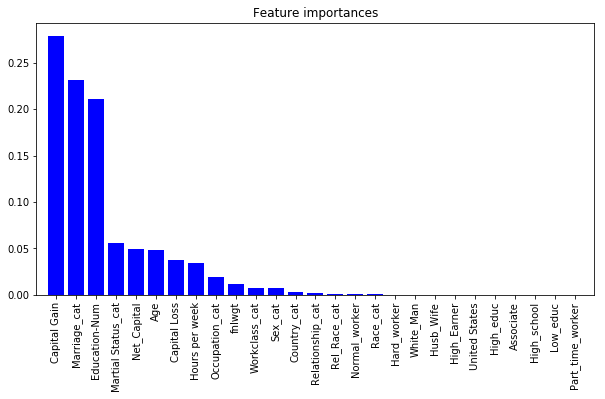

In [216]:
np.random.seed(2019)
model = DecisionTreeClassifier(max_depth=10, random_state=2019)
model.fit(X, y)
draw_feature_importances(model, feats_all)

We'll remove features that were insignificant in both models

In [224]:
feats = ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Net_Capital', 'Hard_worker', 'Normal_worker',
       'Part_time_worker','Workclass_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Sex_cat',
       'Country_cat', 'Rel_Race_cat', 'Marriage_cat'] 
#       'White_Man', 'Associate', 'High_school', 'High_educ', 'Low_educ', 'High_Earner', 'United States', 'Husb_Wife']

Mean Accuracy:  0.8594025000462127 Mean Std:  0.002853197160216578


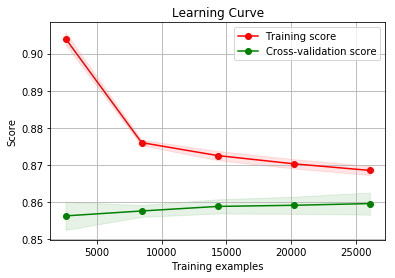

In [225]:
#Doing a model with selected features - Random Forest Classifier
np.random.seed(2019)

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=10, n_estimators=100, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Mean Accuracy:  0.8576519188046134 Mean Std:  0.0036957955737448303


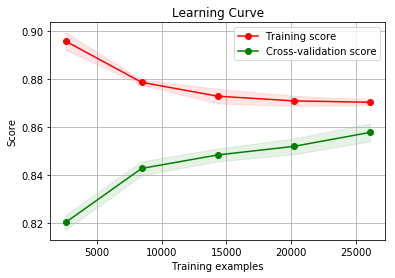

In [226]:
#Doing a model with selected features - Decision Tree Classifier
np.random.seed(2019)

X = train[feats].values
y = train['Target_cat'].values

model = DecisionTreeClassifier(max_depth=10, random_state=2019)
RFC_score = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy: ", np.mean(RFC_score), "Mean Std: ", np.std(RFC_score))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)

Depth 1 :  0.8026166246226127 0.0012982884217031068
Depth 2 :  0.8026166246226127 0.0012982884217031068
Depth 3 :  0.8245141921788628 0.004383988286355221
Depth 4 :  0.8444152330379875 0.0040638174818496894
Depth 5 :  0.845490162181779 0.004593564904825833
Depth 6 :  0.8468721553302391 0.004739128408524118
Depth 7 :  0.8534751372326224 0.0027616132677974106
Depth 8 :  0.855133646900114 0.003928325867408828
Depth 9 :  0.8560857683612175 0.00535820621927448
Depth 10 :  0.8576519188046134 0.0036957955737448303
Depth 11 :  0.8559013705720293 0.0043847013259897755
Depth 12 :  0.8536902192590816 0.005110810939013147
Depth 13 :  0.8517553203930449 0.004167877165720992
Depth 14 :  0.8496669248914758 0.003275174700222116
Depth 15 :  0.8449987522592313 0.003791538822819863
Depth 16 :  0.8407912110007919 0.0026820797749779945
Depth 17 :  0.8388871567015281 0.0037341987742229607
Depth 18 :  0.8351404401554102 0.00489836802764165
Depth 19 :  0.8313628554646518 0.0038145887006944203
Depth 20 :  0.82

Text(0, 0.5, 'Accuracy Score')

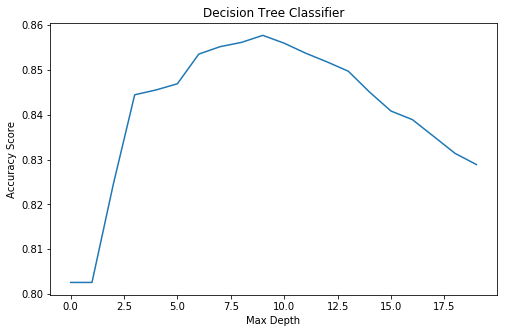

In [227]:
#Checking different depth to optimize the Decision Tree
agg_scores=[]
for i in range(1, 21):
    np.random.seed(2019)
    model = DecisionTreeClassifier(max_depth=i, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("Depth",i , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(agg_scores)
plt.title('Decision Tree Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')

**10** seems to be the optimal depth for the Decision Tree

Depth 1 :  0.7993918890625478 0.0009638822318129816
Depth 2 :  0.8034458393739831 0.0012551450778409956
Depth 3 :  0.8102023509209137 0.0013228603526495844
Depth 4 :  0.8441387448123976 0.0009227931586367748
Depth 5 :  0.8527379940553594 0.002359513740260648
Depth 6 :  0.8547036384611234 0.0028635597261173675
Depth 7 :  0.8555635515964857 0.002632912682568098
Depth 8 :  0.8566077493472702 0.00280752335853521
Depth 9 :  0.8586346773472522 0.002261218530224638
Depth 10 :  0.8594025000462127 0.002853197160216578
Depth 11 :  0.86106092483338 0.002496844558017082
Depth 12 :  0.8620744147690257 0.002653960004944894
Depth 13 :  0.8629343656289764 0.003118674271707329
Depth 14 :  0.8640706726784572 0.0029082004960604194
Depth 15 :  0.8649306093916872 0.003033379113090137
Depth 16 :  0.8653912973523752 0.003495116525837055
Depth 17 :  0.8652684095049364 0.002559188260287267
Depth 18 :  0.8660975676694239 0.0022535720407687518
Depth 19 :  0.8657597958496164 0.00306068201480361
Depth 20 :  0.8650

Text(0, 0.5, 'Accuracy Score')

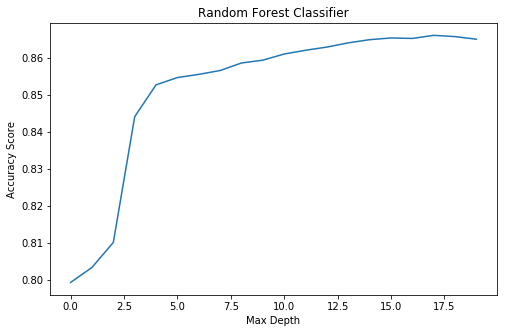

In [228]:
#Checking different depth to optimize Random Forests
agg_scores=[]
for i in range(1, 21):
    np.random.seed(2019)
    model = RandomForestClassifier(max_depth=i, n_estimators=100, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("Depth",i , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

plt.figure(figsize=(8,5))
plt.plot(agg_scores)
plt.title('Random Forest Classifier')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')

Depth over 13 would be overfitting the model.

9-13 seem to be good choices

In [229]:
#Checking different n_estimators to further optimize Random Forests
check_depth = range(9, 15)
check_estimators = range(20, 130, 10)
for j in check_estimators:
    print("N: ", j)
    agg_scores=[]
    for i in check_depth:
        np.random.seed(2019)
        model = RandomForestClassifier(max_depth=i, n_estimators=j, random_state=2019)
        scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
        print("Depth",i , ": ", np.mean(scores), np.std(scores))
        agg_scores.append(np.mean(scores))

N:  20
Depth 9 :  0.8576519518136285 0.0028547656176760063
Depth 10 :  0.8593718110933679 0.0037402733481342347
Depth 11 :  0.8605388165268405 0.0023090940735252057
Depth 12 :  0.8616137503862055 0.003034806880968162
Depth 13 :  0.8623200772901372 0.002618442220581708
Depth 14 :  0.8634871628883604 0.003662261913508579
N:  30
Depth 9 :  0.8577747972209051 0.0030130020346078408
Depth 10 :  0.8597710362680422 0.0028826360258553795
Depth 11 :  0.860354579067154 0.002840607028520309
Depth 12 :  0.8620130227166156 0.0034047079899381136
Depth 13 :  0.8628729594298458 0.0036313314498904797
Depth 14 :  0.8633643410589518 0.0033818929176358645
N:  40
Depth 9 :  0.8580819130968832 0.0029799654894908938
Depth 10 :  0.8598631738601797 0.0027727432944948858
Depth 11 :  0.8609073810421115 0.002875310271152832
Depth 12 :  0.8624429887154438 0.0032613627771020063
Depth 13 :  0.8618287805413554 0.0038931693265262008
Depth 14 :  0.8633950158650757 0.003109216687546393
N:  50
Depth 9 :  0.858174022395579

In nearly all cases depth 13 yields the highest score

In [234]:
#Checking in more detail n_estimators to further optimize Random Forests
agg_scores=[]
check_estimators = range(70, 120, 1)
for j in check_estimators:
    np.random.seed(2019)
    model = RandomForestClassifier(max_depth=13, n_estimators=j, random_state=2019)
    scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)
    print("N", j , ": ", np.mean(scores), np.std(scores))
    agg_scores.append(np.mean(scores))

N 70 :  0.86287297829214 0.003892595302729216
N 71 :  0.8630265126522613 0.0034816888683422953
N 72 :  0.8628729735765663 0.003760908854618384
N 73 :  0.8628729405675515 0.0032872111989378735
N 74 :  0.8629957859748278 0.003282091462814212
N 75 :  0.862750081013554 0.0030963155656147097
N 76 :  0.8627500904447013 0.0032678055085300613
N 77 :  0.8627808029754138 0.003322440115137313
N 78 :  0.8630879329981127 0.0035055727267345347
N 79 :  0.8627500904447013 0.0031740930569546773
N 80 :  0.8629343609134029 0.0030314804328398417
N 81 :  0.8628422280368389 0.0031124461950277848
N 82 :  0.863026503221114 0.003126700533084171
N 83 :  0.862965078159689 0.0031186310369721503
N 84 :  0.8631493391972433 0.0029779511831330226
N 85 :  0.8634564739355157 0.003298677740637377
N 86 :  0.8634871911818021 0.00334330194847307
N 87 :  0.8634257661203769 0.003351272861100024
N 88 :  0.8634872006129491 0.003577324493731327
N 89 :  0.8632107784053892 0.0033442290548084115
N 90 :  0.8631800705902503 0.003483

Mean Accuracy: 0.8636100507357993 Mean Std: 0.0035325959770219585


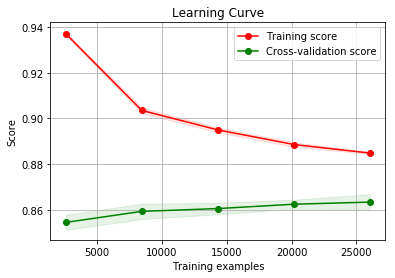

In [236]:
#Score after optimizing the Random Forest
#Mean Accuracy: 0.8636100507357993 Mean Std: 0.0035325959770219585
np.random.seed(2019)
feats = ['Age', 'fnlwgt', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Net_Capital', 'Hard_worker', 'Normal_worker',
       'Part_time_worker','Workclass_cat', 'Martial Status_cat',
       'Occupation_cat', 'Relationship_cat', 'Race_cat', 'Sex_cat',
       'Country_cat', 'Rel_Race_cat', 'Marriage_cat'] 
#       'White_Man', 'Associate', 'High_school', 'High_educ', 'Low_educ', 'High_Earner', 'United States', 'Husb_Wife']

X = train[feats].values
y = train['Target_cat'].values

model = RandomForestClassifier(max_depth=13, n_estimators=109, random_state=2019)
scores = cross_val_score(model, X, y, cv=5, n_jobs=-1)

print("Mean Accuracy:", np.mean(scores), "Mean Std:", np.std(scores))
skplt.estimators.plot_learning_curve(model, X, y, cv=5)